# Packages & Import Functions

In [1]:
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.metrics import confusion_matrix,accuracy_score
import spacy, gensim
import nltk
import re
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import spacy, gensim
from sklearn.metrics import f1_score
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# nlp = spacy.load('en')
import string
from plotly.offline import plot
nltk.download('wordnet')
from sklearn.decomposition.online_lda import LatentDirichletAllocation
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
from collections import Counter
import sklearn.feature_extraction.text as text
from sklearn import decomposition
from sklearn.decomposition import NMF
import gensim
from sklearn.metrics.pairwise import cosine_similarity
from textblob import TextBlob
from nltk.tag import pos_tag
from sklearn.svm import SVC
import heapq
import warnings
from os import listdir
from os.path import isfile, join
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import NMF
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', 300)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AdinBaby\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Loading Competition Dataset

In [2]:
data = pd.read_csv('ID_Desc_URL.csv',error_bad_lines=False,sep=',')


In [3]:
data.head(5)

,id,long_description,link
0,3874,"B Sandipan awakened the play with consciousness giving direction to the artists. This was said by senior painter and actor Rakesh Pandey, Mathura color worker and Braj-speaking ...",https://navbharattimes.indiatimes.com/metro/lucknow/other-news/sandeepan-vimalkant-nagar-was-a-struggling-and-combative-cultural-worker/articleshow/73022935.cms
1,3260,Samajwadi Party founder Mulayam Singh has been admitted to a private hospital in Mumbai due to a stomach problem. Samajwadi Party founder Mulayam Singh (80) was abruptly ...,https://www.seithisolai.com/mulayam-singh-admitted-in-hospital.php
2,1867,The Union Minister of State for the establishment of a new Technology Center in Chennai to promote battery-powered vehicle manufacturing. The use of vehicles to suit the population of the country ...,https://tamil.webdunia.com/article/regional-tamil-news/central-minister-put-stone-for-new-battery-manufacturing-building-in-chennai-119123000004_1.html
3,4988,"PANCARD is to be canceled within three days. Don't be surprised. If you do not link a PAN card with Aadhaar, the PAN card is canceled. They have only 3 days to expire ...",https://www.newspointapp.com/telugu-news/publisher-webdunia-telugu/top-news/articleshow/1450482007046259cf0a35c4c54156d3cd66c1fe
4,2882,"Here's Presenting popular Children Nursery Story 'Krishna And Kaliya | Sri Krishna'. For popular children Stories, kids songs, children songs, children poems, baby songs, baby rhymes, kids nursery rhymes, nursery poems in Tamil visit Etimes Tamil kids sections. Check out Etimes Kids videos secti...",https://timesofindia.indiatimes.com/videos/entertainment/kids/tamil/kids-stories-nursery-rhymes-baby-songs-krishna-and-kaliya-sri-krishna-kids-nursery-story-in-tamil/videoshow/73010220.cms


# Data Preprocessing

In [4]:
# Preprocessing steps

data2Cat = data[data.id.notnull()]
data2Cat["id"] = data2Cat['id'].astype('int64')
data2Cat.dropna(subset=['link','long_description'],how='all',inplace=True)
data2Cat.reset_index(drop=True, inplace=True)
data2Cat

,id,long_description,link
0,3874,"B Sandipan awakened the play with consciousness giving direction to the artists. This was said by senior painter and actor Rakesh Pandey, Mathura color worker and Braj-speaking ...",https://navbharattimes.indiatimes.com/metro/lucknow/other-news/sandeepan-vimalkant-nagar-was-a-struggling-and-combative-cultural-worker/articleshow/73022935.cms
1,3260,Samajwadi Party founder Mulayam Singh has been admitted to a private hospital in Mumbai due to a stomach problem. Samajwadi Party founder Mulayam Singh (80) was abruptly ...,https://www.seithisolai.com/mulayam-singh-admitted-in-hospital.php
2,1867,The Union Minister of State for the establishment of a new Technology Center in Chennai to promote battery-powered vehicle manufacturing. The use of vehicles to suit the population of the country ...,https://tamil.webdunia.com/article/regional-tamil-news/central-minister-put-stone-for-new-battery-manufacturing-building-in-chennai-119123000004_1.html
3,4988,"PANCARD is to be canceled within three days. Don't be surprised. If you do not link a PAN card with Aadhaar, the PAN card is canceled. They have only 3 days to expire ...",https://www.newspointapp.com/telugu-news/publisher-webdunia-telugu/top-news/articleshow/1450482007046259cf0a35c4c54156d3cd66c1fe
4,2882,"Here's Presenting popular Children Nursery Story 'Krishna And Kaliya | Sri Krishna'. For popular children Stories, kids songs, children songs, children poems, baby songs, baby rhymes, kids nursery rhymes, nursery poems in Tamil visit Etimes Tamil kids sections. Check out Etimes Kids videos secti...",https://timesofindia.indiatimes.com/videos/entertainment/kids/tamil/kids-stories-nursery-rhymes-baby-songs-krishna-and-kaliya-sri-krishna-kids-nursery-story-in-tamil/videoshow/73010220.cms
5,2675,Norwich City v Tottenham Hotspur - Premier League Hello and welcome to the EPL transfer news roundup for the day! Here are the top stories of the day surrounding the ! Erling Braut Haaland joins Dortmund Borussia Dortmund have confirmed the signing of Erling Braut Haaland from Red Bull Salzburg....,https://www.newspointapp.com/english-news/publisher-sportskeeda/top-news/tottenham-willing-offer-christian-eriksen-real-madrid-swap-deal-more-epl-transfer-news-roundup-30th-december-2019/articleshow/14504820cbdd450bc9083874f53f83d52aeb1ece
6,2058,New Delhi is good news for Reliance JioFiber users. The company is now offering 1TB (1000GB) of data on its Rs 199 top-up voucher. Earlier only 100GB data was available in this plan. In plan's validity ...,https://navbharattimes.indiatimes.com/tech/gadgets-news/reliance-jio-rupees-199-top-up-voucher-offering-1tb-data-with-7-days-of-validity/articleshow/73024124.cms
7,3875,"The Bollywood fraternity on Friday expressed pain and shock on the news of TV actor Kushal Punjabi's untimely death. Kushal committed suicide at his home in Mumbai's Bandra area late on Thursday night. As per a statement from the police, the actor \committed suicide by hanging himself from a fan...",https://timesofindia.indiatimes.com/videos/entertainment/hindi/from-farhan-akhtar-to-ranvir-shorey-bollywood-mournskushal-punjabis-untimely-death/videoshow/73024843.cms
8,2481,"Hemant Soren, the working president of the Jharkhand Mukti Morcha (JMM), was sworn in as the Chief Minister of the state here on Sunday and said that his government will continue to emphasize on education and health. Soren's main ...",https://www.newspointapp.com/hindi-news/publisher-vishvatimes-hindi/top-news/articleshow/14504820806e7880bf0c81749e1c135de9b397ef
9,4615,"A traffic police constable helped an underprivileged boy recover a bicycle, which was gifted to him, in Bandra (west) on Saturday.",https://timesofindia.indiatimes.com/city/mumbai/mumbai-cop-stops-bicycle-thief-saves-the-day-for-househelps-son-who-had-received-a-gift/articleshow/73025191.cms


# Loading Google Word2Vec Model

Google’s pre-trained model which includes word vectors for a vocabulary of 3 million words and phrases that they trained on roughly 100 billion words from a Google News dataset. The vector length is 300 features.


In [5]:
# from gensim.models import Word2Vec
from gensim.models.word2vec import Word2Vec
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

# Constructing Category Tree

We need to construct category tree using any python data structure. Here we use Anytree package as below.

In [6]:
from anytree import Node, RenderTree, PreOrderIter

# Root node
root = Node("Categories")

# First level nodes
politics = Node("politics", parent=root)
sports = Node("sports", parent=root)
news = Node("news", parent=root)
education = Node("education", parent=root)
finance = Node("finance", parent=root)
entertainment = Node("entertainment", parent=root)
health = Node("health", parent=root)
environment = Node("environment", parent=root)

# Second level nodes
humor = Node("humor", parent=entertainment)
game = Node("game", parent=entertainment)
movie = Node("movie", parent=entertainment)
drama = Node("drama", parent=entertainment)
puzzle = Node("puzzle", parent=entertainment)
hobby = Node("hobby", parent=entertainment)
music = Node("music", parent=entertainment)
dance = Node("dance", parent=entertainment)

# Second level nodes
world = Node("global", parent=news)
national = Node("national", parent=news)
regional = Node("regional", parent=news)

# Second level nodes
pol_global = Node("global", parent=politics)
pol_national = Node("national", parent=politics)
pol_regional = Node("regional", parent=politics)

# Second level nodes
emergency = Node("emergency", parent=health)
casual = Node("casual", parent=health)

# Second level nodes
investment = Node("investment", parent=finance)
banking = Node("banking", parent=finance)

# Second level nodes
climate = Node("climate", parent=environment)
forest = Node("forest", parent=environment)


for pre, fill, node in RenderTree(root):
    print("%s%s" % (pre, node.name))

Categories
├── politics
│   ├── global
│   ├── national
│   └── regional
├── sports
├── news
│   ├── global
│   ├── national
│   └── regional
├── education
├── finance
│   ├── investment
│   └── banking
├── entertainment
│   ├── humor
│   ├── game
│   ├── movie
│   ├── drama
│   ├── puzzle
│   ├── hobby
│   ├── music
│   └── dance
├── health
│   ├── emergency
│   └── casual
└── environment
    ├── climate
    └── forest


# Reading given Category Tree HDFS

In [7]:
from anytree import Node, RenderTree, PreOrderIter, find_by_attr

catData = pd.read_csv('cat_tree.csv',error_bad_lines=False,sep=',')

catData.head(5)

,cm_name,category_tree_text
0,Industry,Industry
1,International,Industry^Travel^Air Travel^International
2,Hotel,Industry^Travel^Hotel
3,Travel Booking Services,Industry^Travel^Travel Booking Services
4,Automobiles,Industry^Automobiles


# Constructing given Category Tree

In [8]:
# Creating the Category Tree as Python Data structure - Anytree

with open('cat_tree.csv', 'r') as f:
    lines = f.readlines()[1:]

    root = Node(lines[0].split(",")[1].strip())

    for line in lines:
        
        line = line.split(",")[1]
        
        for idx, cats in enumerate(line.split("^")[1:]):
            
            catNode = find_by_attr(root, cats.strip())
            
            if (catNode is None):
                parentNode = find_by_attr(root, line.split("^")[idx])
    
                if parentNode is None:
                    Node(cats.strip(), parent=root)
                else:
                    Node(cats.strip(), parent=parentNode)

            
for pre, _, node in RenderTree(root):
                print("%s%s" % (pre, node.name))

Industry
├── Travel
│   ├── Air Travel
│   │   └── International
│   ├── Hotel
│   ├── Travel Booking Services
│   ├── Auto Rentals
│   │   ├── Bike
│   │   └── Car
│   ├── Cabs
│   ├── Tourism
│   │   └── Domestic
│   └── Vacation
├── Automobiles
│   ├── Four Wheeler
│   │   ├── Hatchback
│   │   ├── SUV
│   │   ├── Sedan
│   │   ├── Budget Cars
│   │   ├── Certified Pre-Owned Cars
│   │   ├── Luxury Cars
│   │   ├── Electric Cars
│   │   ├── Large Vehicles
│   │   └── Premium Cars
│   ├── Auto Parts
│   └── Two Wheeler
│       ├── Bikes
│       ├── Scooters
│       ├── Electric Bikes
│       └── Premium Bikes
├── Shopping
│   ├── Books & Audible
│   │   └── Kindle E-Reader & eBooks
│   ├── Malls & Shopping Centers
│   ├── Electronics
│   │   ├── Home Appliances
│   │   ├── Kitchen Appliances
│   │   └── Entertainment Appliances
│   ├── Coupons and Discounts
│   ├── Fashion
│   │   ├── Men
│   │   └── Women
│   ├── Health & Beauty
│   ├── Makeup and Accessories
│   ├── Watches
│   ├──

# Tweaking Category Tree

Multi-words categories having different meanings are combined into similar meaning words so that distance metrics won't go awry.

In [9]:
len(root.children)

religionNode = find_by_attr(root, 'Religion & Spirituality')
religionNode.name = 'Religion'

onlineNode = find_by_attr(root, 'Online Services')
onlineNode.name = 'Online'

family = find_by_attr(root, 'Family and Relationships')
family.name = 'Family Relationships'

family = find_by_attr(root, 'Real Estate')
family.name = 'Realty'

education = find_by_attr(root, 'Education')
education.name = 'Schooling'

politics = find_by_attr(root, 'News & Politics')
politics.name = 'Politics'

banking = find_by_attr(root, 'Banking & Finance')
banking.name = 'Banking'

food = find_by_attr(root, 'Food & Dining')
food.name = 'Food'

career = find_by_attr(root, 'Career & Job')
career.name = 'Profession'

sports = find_by_attr(root, 'Sports & Games')
sports.name = 'Sports'


for pre, _, node in RenderTree(root):
                print("%s%s" % (pre, node.name))

Industry
├── Travel
│   ├── Air Travel
│   │   └── International
│   ├── Hotel
│   ├── Travel Booking Services
│   ├── Auto Rentals
│   │   ├── Bike
│   │   └── Car
│   ├── Cabs
│   ├── Tourism
│   │   └── Domestic
│   └── Vacation
├── Automobiles
│   ├── Four Wheeler
│   │   ├── Hatchback
│   │   ├── SUV
│   │   ├── Sedan
│   │   ├── Budget Cars
│   │   ├── Certified Pre-Owned Cars
│   │   ├── Luxury Cars
│   │   ├── Electric Cars
│   │   ├── Large Vehicles
│   │   └── Premium Cars
│   ├── Auto Parts
│   └── Two Wheeler
│       ├── Bikes
│       ├── Scooters
│       ├── Electric Bikes
│       └── Premium Bikes
├── Shopping
│   ├── Books & Audible
│   │   └── Kindle E-Reader & eBooks
│   ├── Malls & Shopping Centers
│   ├── Electronics
│   │   ├── Home Appliances
│   │   ├── Kitchen Appliances
│   │   └── Entertainment Appliances
│   ├── Coupons and Discounts
│   ├── Fashion
│   │   ├── Men
│   │   └── Women
│   ├── Health & Beauty
│   ├── Makeup and Accessories
│   ├── Watches
│   ├──

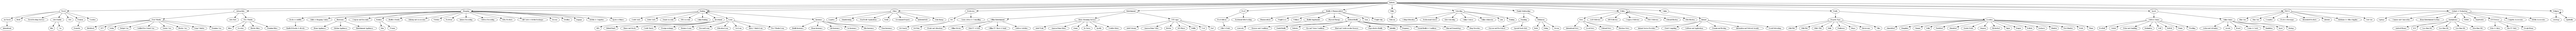

In [10]:
from anytree.exporter import DotExporter
from IPython.display import Image

# from graphviz import Source
# from graphviz import render

import os
os.environ["PATH"] += os.pathsep + 'D:/graphviz-2.38/release/bin'

# graphviz needs to be installed for the next line!
DotExporter(root).to_picture("root.png")
Image(filename='root.png') 


# URL based Category Tree Classifier

Here we use the tree information embedded in the URL links from database to find the category.

In [11]:
# idURL = pd.read_csv('ID_URLs.csv',error_bad_lines=False,sep=',')
idURL = data2Cat[['id', 'link']]
idURL

,id,link
0,3874,https://navbharattimes.indiatimes.com/metro/lucknow/other-news/sandeepan-vimalkant-nagar-was-a-struggling-and-combative-cultural-worker/articleshow/73022935.cms
1,3260,https://www.seithisolai.com/mulayam-singh-admitted-in-hospital.php
2,1867,https://tamil.webdunia.com/article/regional-tamil-news/central-minister-put-stone-for-new-battery-manufacturing-building-in-chennai-119123000004_1.html
3,4988,https://www.newspointapp.com/telugu-news/publisher-webdunia-telugu/top-news/articleshow/1450482007046259cf0a35c4c54156d3cd66c1fe
4,2882,https://timesofindia.indiatimes.com/videos/entertainment/kids/tamil/kids-stories-nursery-rhymes-baby-songs-krishna-and-kaliya-sri-krishna-kids-nursery-story-in-tamil/videoshow/73010220.cms
5,2675,https://www.newspointapp.com/english-news/publisher-sportskeeda/top-news/tottenham-willing-offer-christian-eriksen-real-madrid-swap-deal-more-epl-transfer-news-roundup-30th-december-2019/articleshow/14504820cbdd450bc9083874f53f83d52aeb1ece
6,2058,https://navbharattimes.indiatimes.com/tech/gadgets-news/reliance-jio-rupees-199-top-up-voucher-offering-1tb-data-with-7-days-of-validity/articleshow/73024124.cms
7,3875,https://timesofindia.indiatimes.com/videos/entertainment/hindi/from-farhan-akhtar-to-ranvir-shorey-bollywood-mournskushal-punjabis-untimely-death/videoshow/73024843.cms
8,2481,https://www.newspointapp.com/hindi-news/publisher-vishvatimes-hindi/top-news/articleshow/14504820806e7880bf0c81749e1c135de9b397ef
9,4615,https://timesofindia.indiatimes.com/city/mumbai/mumbai-cop-stops-bicycle-thief-saves-the-day-for-househelps-son-who-had-received-a-gift/articleshow/73025191.cms


## URL Parser Matcher with Category Tree

In [12]:
# To find out category tree based on the URL links

stop_words = set(stopwords.words('english'))
cutoff = 0.25
urlMappings = []

for id, url in zip(idURL['id'], idURL ['link']):

    urlCat = url.split("/")[3:-2]
    urlCat

    totalSimScore = 0
    category_levels = [root]

    for word in urlCat:

        if ('-' in word):
            keywords = word.lower().split("-")
        else:
            keywords = [word.lower()]

        filtered_words = [w for w in keywords if not w in stop_words]

        for urlWords in filtered_words:
            level_similarity = []
            subCategories = category_levels[len(category_levels)-1].children

            for i in range(len(subCategories)):

                subCatWords = re.sub(r'[^A-Za-z0-9 ]+', '', subCategories[i].name).lower().split()

                similarityScore = 0
                for catWords in subCatWords:
                    if urlWords in model and catWords in model:
                        similarityScore += model.similarity(urlWords, catWords)

                level_similarity.append(similarityScore/ len(subCatWords))

            maxsim_this_level = max(level_similarity, default=0)
            if (maxsim_this_level > cutoff):
                category_levels.append(subCategories[np.argmax(level_similarity)])
                totalSimScore += maxsim_this_level

                
    if (len(category_levels) > 1):
        confidence = float(totalSimScore/(len(category_levels)-1))
    else:
        confidence = 0

    
    urlMappings.append([id, category_levels[len(category_levels)-1], confidence])

urlCatDetects = pd.DataFrame(urlMappings) 
urlCatDetects.head(5)

,0,1,2
0,3874,Node('/Industry/Sports'),0.313866
1,3260,Node('/Industry'),0.000000
2,1867,Node('/Industry'),0.000000
3,4988,Node('/Industry/Sports'),0.313866
4,2882,Node('/Industry/Online/Internet'),0.339198


In [ ]:
urlCatDetects.to_csv('urlCatDetects.csv',index=False)

urlCatDetects.csv contains the category tree. Please ignore the above error (i just terminated the execution)

# Category Tree Classifier using Article Description

In [20]:

idesc = data2Cat[['id', 'long_description']]
idesc

,id,long_description
0,3874,"B Sandipan awakened the play with consciousness giving direction to the artists. This was said by senior painter and actor Rakesh Pandey, Mathura color worker and Braj-speaking ..."
1,3260,Samajwadi Party founder Mulayam Singh has been admitted to a private hospital in Mumbai due to a stomach problem. Samajwadi Party founder Mulayam Singh (80) was abruptly ...
2,1867,The Union Minister of State for the establishment of a new Technology Center in Chennai to promote battery-powered vehicle manufacturing. The use of vehicles to suit the population of the country ...
3,4988,"PANCARD is to be canceled within three days. Don't be surprised. If you do not link a PAN card with Aadhaar, the PAN card is canceled. They have only 3 days to expire ..."
4,2882,"Here's Presenting popular Children Nursery Story 'Krishna And Kaliya | Sri Krishna'. For popular children Stories, kids songs, children songs, children poems, baby songs, baby rhymes, kids nursery rhymes, nursery poems in Tamil visit Etimes Tamil kids sections. Check out Etimes Kids videos secti..."
5,2675,Norwich City v Tottenham Hotspur - Premier League Hello and welcome to the EPL transfer news roundup for the day! Here are the top stories of the day surrounding the ! Erling Braut Haaland joins Dortmund Borussia Dortmund have confirmed the signing of Erling Braut Haaland from Red Bull Salzburg....
6,2058,New Delhi is good news for Reliance JioFiber users. The company is now offering 1TB (1000GB) of data on its Rs 199 top-up voucher. Earlier only 100GB data was available in this plan. In plan's validity ...
7,3875,"The Bollywood fraternity on Friday expressed pain and shock on the news of TV actor Kushal Punjabi's untimely death. Kushal committed suicide at his home in Mumbai's Bandra area late on Thursday night. As per a statement from the police, the actor \committed suicide by hanging himself from a fan..."
8,2481,"Hemant Soren, the working president of the Jharkhand Mukti Morcha (JMM), was sworn in as the Chief Minister of the state here on Sunday and said that his government will continue to emphasize on education and health. Soren's main ..."
9,4615,"A traffic police constable helped an underprivileged boy recover a bicycle, which was gifted to him, in Bandra (west) on Saturday."


In [21]:
# To compute the confidence score of category prediction based on the numerical distribution of values in the list
def computeConfidence(similarityList):
    
    similarScores = set(similarityList) 
    highest = max(similarScores)
    
    similarScores.remove(highest)
    if (len(similarScores) == 0):
        return 0
    
    secondHighest = max(similarScores)
    
    return (highest - secondHighest)/ (highest)

In [40]:
# To do multi level classification - category tree - using all the words 
# in the article (stop words remove and cleaned) and also the words in the category tree nodes.

stop_words = set(stopwords.words('english'))
similarity_cutoff = 0.3
confidence_cutoff = 0.05

categoryMappings = []

for id, fulltxt in zip(idesc['id'], idesc['long_description']):


    fulltxt_filtered = [w for w in str(fulltxt).lower().split() if not w in stop_words]
    
    category_levels = [root]
    
    while True:
    
        tree_level = len(category_levels)
        
        subCategories = category_levels[tree_level - 1].children
        
        if len(subCategories) == 0:

            categoryMappings.append([id, category_levels[tree_level - 1], confidenceRow])
            break
        
        level_similarity = [0] * len(subCategories)

        for word in fulltxt_filtered:
            # To exclude small words
            if len(word) < 3:
                continue
                
            if word in model:
                # To handle categories with multiple words. Eg: Banking & Finance
                for i in range(len(subCategories)):
                    subCatWords = re.sub(r'[^A-Za-z0-9 ]+', '', subCategories[i].name).lower().split()

                    similarityCategory = []
                    for catWords in subCatWords:
                        if catWords in model:
                            
                            similarityCategory.append(abs(model.similarity(word, catWords)))
                    
                    if (len(similarityCategory) > 0):
                        level_similarity[i] = level_similarity[i] + similarityCategory[np.argmax(similarityCategory)]

        maxsim_this_level = max(level_similarity, default=0)
        confidence = computeConfidence(level_similarity)
        
        # For level 1 entry, there is no confidence cutoff. 
        # If level > 1, then confidence score should be > cutoff
        if (maxsim_this_level > similarity_cutoff and 
                (tree_level == 1 or confidence > confidence_cutoff)):
            
            if (tree_level == 1):
                confidenceRow = confidence
            category_levels.append(subCategories[np.argmax(level_similarity)])
        else:
            categoryMappings.append([id, category_levels[tree_level - 1], confidenceRow])
            break
            
catDetects = pd.DataFrame(categoryMappings) 
catDetects.head(5)
    
# computeConfidence < 0.25 then the w2v classification is considered ambiguous

,0,1,2
0,3874,Node('/Industry/Politics/Politics/BJP Followers'),0.090846
1,3260,Node('/Industry/Family Relationships/Matrimony/Groom'),0.141484
2,1867,Node('/Industry/Gadgets & Technology/Home Entertainment Systems'),0.173548
3,4988,Node('/Industry/Online'),0.093610
4,2882,Node('/Industry/Family Relationships/Parenting/Special Needs Kids'),0.037887


In [41]:
catDetects.to_csv('textCatDetects.csv',index=False)

## Standby Logic to do 1st Level Classification

In [ ]:
# To do 1st level classification

# let category be defined as below
categories = ["politics", "sports", "news", "education", "finance", "entertainment", "health", "environment"]

for id, article in zip(englishArticles['id'], englishArticles['long_description']):

    similarity = [0] * len(categories)
    for word in article.split():

        if word in model:
            for i in range(len(categories)):
                similarity[i] = similarity[i] + model.similarity(word, categories[i])
                
    print("Category: ")
    print(categories[np.argmax(similarity)], similarity, max(similarity), computeConfidence(similarity))
    
    # computeConfidence < threshold then the w2v classification is ambiguous

# Merging Article Description Classifier with URL & LDA-NMF Classifiers

The results of word to vector methods over article description and article URL need to be merged with LDA-NMF combination model, which is done separately.

In [82]:
artClassifier = pd.read_csv('textCatDetects.csv',error_bad_lines=False,sep=',')
artClassifier.head(5)

,id,category,confidence
0,3874,Node('/Industry/Politics/Politics/BJP Followers'),0.090846
1,3260,Node('/Industry/Family Relationships/Matrimony/Groom'),0.141484
2,1867,Node('/Industry/Gadgets & Technology/Home Entertainment Systems'),0.173548
3,4988,Node('/Industry/Online'),0.093610
4,2882,Node('/Industry/Family Relationships/Parenting/Special Needs Kids'),0.037887


In [83]:
urlClassifier = pd.read_csv('urlCatDetects.csv',error_bad_lines=False,sep=',')
urlClassifier.head(5)

,id,category,confidence
0,3874,Node('/Industry/News & Politics/Politics'),0.432521
1,3260,Node('/Industry'),0.000000
2,1867,Node('/Industry'),0.000000
3,4988,Node('/Industry/Entertainment Movie'),0.325226
4,2882,Node('/Industry/Online/Internet'),0.339198


In [84]:
ldanmfClassifier = pd.read_csv('LDA-NMF-Result.csv',error_bad_lines=False,sep=',')
ldanmfClassifier.head(5)

,id,category_tree
0,5177,News & Politics
1,2882,Education/KidEducation
2,2675,News/Relationship
3,2676,News/
4,3875,Finance/OTT APPS/News/Business/Location


## LDA, NMF, W2V Merger Logic

In [89]:

result = []
for idx in artClassifier.index: 
    
    if (artClassifier['confidence'][idx] > 0.05):
        result.append([artClassifier['id'][idx], str(artClassifier['category'][idx])[6:-2].replace("/", "^")])
        
    elif (urlClassifier['confidence'][idx] > 0.4):
        result.append([urlClassifier['id'][idx], str(urlClassifier['category'][idx])[6:-2].replace("/", "^")])
    else:
        row = ldanmfClassifier.loc[ldanmfClassifier['id'] == artClassifier['id'][idx]]
    
        if (len(row) == 0):
            result.append([artClassifier['id'][idx], str(artClassifier['category'][idx])[6:-2].replace("/", "^")])
        else:
            result.append([artClassifier['id'][idx], row['category_tree'].to_string(index=False)])
    

In [90]:
resultDF = pd.DataFrame(result) 
resultDF.to_csv('Result_Submission.csv',index=False)

The resuls are found in the file: Result_Submission.csv. It contains document id and corresponding category tree.